## Fetching Data

In [1]:
from sklearn.datasets import fetch_openml

In [18]:
mnist = fetch_openml('mnist_784')

In [3]:
#mnist

In [30]:
x, y = mnist['data'], mnist['target']

In [31]:
x.shape

(70000, 784)

In [32]:
y.shape

(70000,)

In [33]:
%matplotlib inline

In [34]:
import matplotlib
import matplotlib.pyplot as plt

In [95]:
some_digits = x[36001]
some_digits_image = some_digits.reshape(28, 28) #reshape and plot it

(-0.5, 27.5, 27.5, -0.5)

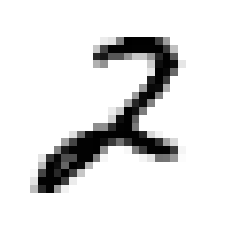

In [96]:
plt.imshow(some_digits_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [97]:
y[36001]

'2'

In [98]:
x_train, x_test = x[:60000], x[60000:]

In [99]:
y_train, y_test = y[:60000], y[60000]

In [100]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 Detector

In [101]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [102]:
y_test

array([6, 0, 1, 1, 5, 2, 8, 3, 0, 4, 9, 5, 2, 6, 7, 7, 3, 8, 5, 9, 1, 1,
       8, 0, 6, 4, 5, 5, 4, 6, 8, 6, 3, 3, 0, 4, 9, 4, 2, 2, 3, 8, 9, 1,
       2, 0, 7, 6, 3, 4, 7, 9, 1, 7, 7, 2, 2, 3, 4, 3, 2, 9, 1, 2, 7, 0,
       8, 9, 5, 3, 1, 3, 8, 9, 9, 1, 0, 5, 9, 2, 2, 3, 1, 1, 9, 6, 5, 7,
       7, 3, 6, 7, 9, 8, 0, 4, 5, 0, 3, 2, 9, 4, 6, 0, 1, 2, 3, 4, 1, 7,
       1, 8, 5, 0, 2, 7, 1, 0, 3, 6, 4, 9, 1, 3, 2, 2, 2, 4, 4, 8, 7, 6,
       7, 0, 7, 1, 8, 0, 2, 6, 7, 7, 1, 2, 2, 9, 0, 7, 3, 9, 6, 5, 8, 8,
       4, 9, 9, 6, 8, 6, 4, 2, 9, 8, 9, 1, 9, 7, 2, 5, 3, 5, 2, 7, 9, 3,
       7, 5, 6, 0, 5, 1, 3, 1, 4, 3, 1, 8, 5, 4, 2, 9, 1, 4, 6, 5, 8, 1,
       5, 8, 5, 6, 7, 8, 2, 9, 1, 0, 1, 1, 4, 2, 2, 3, 8, 4, 3, 5, 4, 6,
       4, 7, 2, 8, 7, 9, 1, 0, 0, 1, 3, 2, 1, 3, 9, 4, 6, 5, 9, 6, 8, 7,
       8, 8, 1, 0, 6, 1, 7, 2, 7, 3, 2, 4, 1, 5, 4, 6, 4, 7, 4, 8, 1, 9,
       5, 6, 6, 6, 4, 3, 2, 4, 9, 2, 5, 8, 5, 1, 7, 0, 7, 6, 3, 4, 8, 9,
       3, 7, 8, 2, 5, 3, 0, 3, 9, 9, 0, 3, 3, 3, 5,

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')   #Create classifier

In [105]:
clf.fit(x_train, y_train_2)

c:\users\apu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [106]:
clf.predict([some_digits])

array([ True])

In [107]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

c:\users\apu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\apu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [108]:
a.mean()

0.8825